In [1]:
val path = "/Users/shawnmeier/Documents/source/bounder/soot_hopper/target/scala-2.13/soot_hopper-assembly-0.1.jar"
// note: use sbt assembly to create jar
interp.load.cp(os.Path(path))
import $ivy.`org.plotly-scala::plotly-almond:0.8.2`
import $ivy.`com.lihaoyi:ujson_2.13:1.3.8`
// import $ivy.`edu.colorado.plv.bounder:soot_hopper_2.13:0.1`

import ujson.Value
import sys.process._

// interp.load.ivy("com.github.pathikrit" %% "better-files" % "3.9.1")
import $ivy.`com.github.pathikrit::better-files:3.9.1`
import better.files._
import $ivy.`com.lihaoyi::ujson:1.3.12`
import $ivy.`com.lihaoyi::requests:0.6.5`
import $ivy.`com.lihaoyi::scalatags:0.12.0`



path: String = "/Users/shawnmeier/Documents/source/bounder/soot_hopper/target/scala-2.13/soot_hopper-assembly-0.1.jar"
import $ivy.$                                      

import $ivy.$                             
// import $ivy.`edu.colorado.plv.bounder:soot_hopper_2.13:0.1`


import ujson.Value

import sys.process._

// interp.load.ivy("com.github.pathikrit" %% "better-files" % "3.9.1")

import $ivy.$                                         

import better.files._

import $ivy.$                          

import $ivy.$                            

import $ivy.$                              



In [2]:
import scala.util.Random
import edu.colorado.plv.bounder.Driver
import edu.colorado.plv.bounder.RunConfig
import edu.colorado.plv.bounder.symbolicexecutor.state.PureConstraint
import upickle.default.read
import scala.collection.parallel.CollectionConverters.{ImmutableSetIsParallelizable, IterableIsParallelizable}

import plotly._
import plotly.element._
import plotly.layout._
import plotly.Almond._
import upickle.default.{read, write}

import scala.util.Random

import edu.colorado.plv.bounder.Driver

import edu.colorado.plv.bounder.RunConfig

import edu.colorado.plv.bounder.symbolicexecutor.state.PureConstraint

import upickle.default.read

import scala.collection.parallel.CollectionConverters.{ImmutableSetIsParallelizable, IterableIsParallelizable}


import plotly._

import plotly.element._

import plotly.layout._

import plotly.Almond._

import upickle.default.{read, write}

In [3]:
import edu.colorado.plv.bounder.symbolicexecutor.state.DBOutputMode
import edu.colorado.plv.bounder.symbolicexecutor.state.{DBPathNode,IPathNode,PrettyPrinting}
import edu.colorado.plv.bounder.ir._
import edu.colorado.plv.bounder.symbolicexecutor.QueryFinished
import edu.colorado.plv.bounder.BounderUtil
def obsMessagesStr(nodes:List[DBPathNode]):List[DBPathNode] = {
nodes.flatMap{n =>
  n.qry.loc match {
    case c : CallinMethodReturn => Some(n)
    case c : CallinMethodInvoke => Some(n)
    case c : GroupedCallinMethodInvoke => Some(n)
    case c : GroupedCallinMethodReturn => Some(n)
    case c : CallbackMethodInvoke => Some(n)
    case c : CallbackMethodReturn => Some(n)
    case _ => None
  }}
}

// implicit val db = DBOutputMode("/Users/shawnmeier/Desktop/db_triage/connectbot1.db",true)
implicit val db = DBOutputMode("/Users/shawnmeier/Desktop/row4_still_running.db")

import edu.colorado.plv.bounder.symbolicexecutor.state.DBOutputMode

import edu.colorado.plv.bounder.symbolicexecutor.state.{DBPathNode,IPathNode,PrettyPrinting}

import edu.colorado.plv.bounder.ir._

import edu.colorado.plv.bounder.symbolicexecutor.QueryFinished

import edu.colorado.plv.bounder.BounderUtil

defined function obsMessagesStr
db: DBOutputMode = DBOutputMode(
  dbfile = "/Users/shawnmeier/Desktop/row4_still_running.db"
)

In [6]:
// File.usingTemporaryFile() {tempFile =>
//   val dbgCre:Set[IPathNode] = db.getAllNodes().filter{n => n.qry.state.toString.contains("setNegativeButton")}.take(4).toSet
//   // println(s"found ${dbgCre.size} nodes")
//   PrettyPrinting.printTraces(dbgCre, tempFile.toString, false)
//   // println(tempFile.contentAsString)
// } 
import scala.collection.mutable
import scala.util.Random
val traces = mutable.HashSet[String]()
// Random.shuffle(db.getAllNodes().filter{n => !n.qry.searchState.toString.contains("live")}).foreach{a => 
Random.shuffle(db.getNoSucc()).take(3).foreach{a => 
    println(PrettyPrinting.qryString(a.qry))
    if (PrettyPrinting.filterForLocSeq(a, List())){
        File.usingTemporaryFile() {tempFile =>
            PrettyPrinting.printTraces(Set(a), tempFile.toString, false)
            val strOf = tempFile.contentAsString
            if(true || strOf.contains("setNegativeButton")){
                traces.addOne(strOf)
            }
        }
    }
}
val allF = File("tmpall.txt")
traces.foreach(allF.append)

[CB Inv] com.example.createdestroy.MyActivity void onCreate(android.os.Bundle)
       state: (    heap: p-4.v->p-3          pure: p-5  !=  NULL && p-2  !=  NULL && p-4  !=  NULL && p-3  !=  NULL && p-6  !=  NULL && p-7  !=  NULL && p-5  !=  p-2 && p-4  !=  p-7 && p-4  !=  p-1 && p-9  !=  NULL && p-1  !=  NULL         types: List(p-1:{4408}, p-3:{787,1047,1603,1642,1677 ...}, p-4:{4408}, p-2:{4417}, p-6:{787,1047,1603,1642,1677 ...}, p-9:{787,1047,1603,1642,1677 ...}, p-7:{4408}, p-5:{4417})    trace: O(CBEnter I_CBEnter_ActivityonCreate ( _T_,p-1 );O(CIExit I_CIExit_ActivityfindView ( p-9,p-1 );p-2;O(CIExit I_CIExit_ViewsetOnClickListener ( _T_,p-9,p-2 );O(CBEnter I_CBEnter_ActivityonCreate ( _T_,p-7 );O(CIExit I_CIExit_ActivityfindView ( p-6,p-7 );p-5;O(CIExit I_CIExit_ViewsetOnClickListener ( _T_,p-6,p-5 );O(CBExit I_CBExit_ActivityonPause ( _T_,p-1 );O(CIExit I_CIExit_Activityfinish ( _T_,p-4 );O(CIExit I_CIExit_ViewsetOnClickListener ( _T_,p-3,NULL );O(CBEnter I_CBEnter_ViewOnClick

import scala.collection.mutable

import scala.util.Random

traces: mutable.HashSet[String] = HashSet(
  """subsumed by:
 -- [CB Inv] com.example.createdestroy.MyActivity void onPause()
       state: (    heap: p-6.v->p-5          pure: p-5  !=  NULL && p-2  !=  NULL && p-4  !=  NULL && p-6  !=  NULL && p-1  !=  NULL         types: List(p-1:{4408}, p-4:{787,1047,1603,1642,1677 ...}, p-2:{4417}, p-6:{4408}, p-5:{787,1047,1603,1642,1677 ...})    trace: O(CBExit I_CBExit_ActivityonPause ( _T_,p-1 );O(CIExit I_CIExit_Activityfinish ( _T_,p-6 );O(CIExit I_CIExit_ViewsetOnClickListener ( _T_,p-5,NULL );O(CBEnter I_CBEnter_ActivityonCreate ( _T_,p-1 );O(CIExit I_CIExit_ActivityfindView ( p-4,p-1 );p-2;O(CIExit I_CIExit_ViewsetOnClickListener ( _T_,p-4,p-2 );O(CBEnter I_CBEnter_ViewOnClickListeneronClick ( _T_,p-2 ))

    [CB Inv] com.example.createdestroy.MyActivity void onCreate(android.os.Bundle)
       state: (    heap: p-4.v->p-3          pure: p-5  !=  NULL && p-2  !=  NULL && p-4  !=  NU

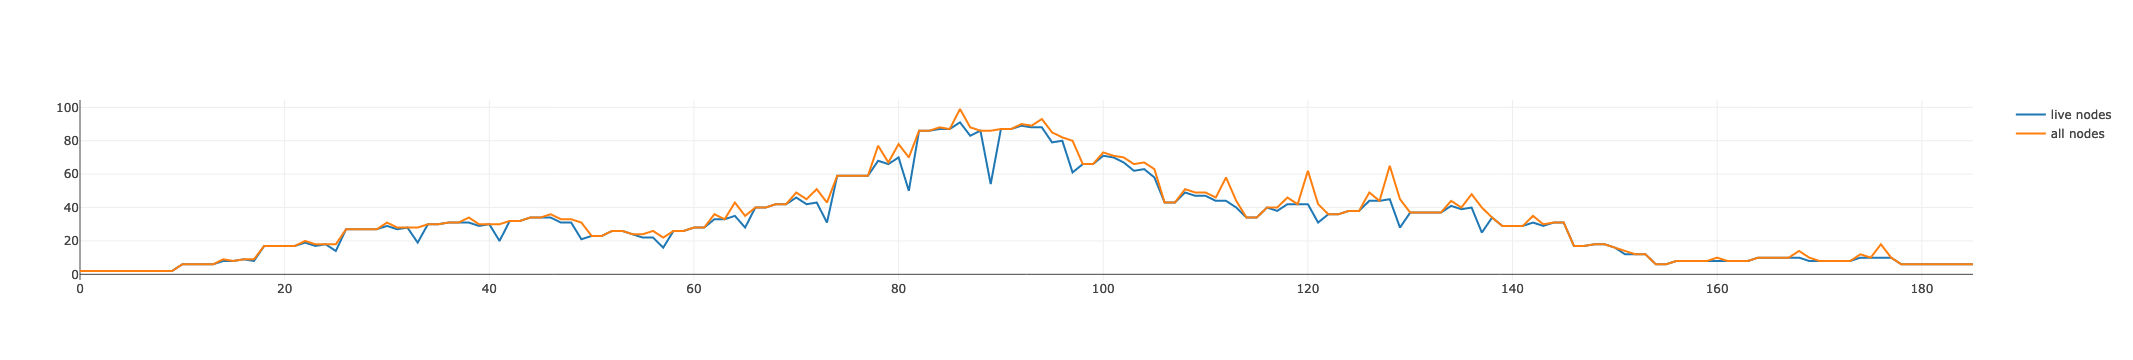

defined object LiveNodes
res4_1: String = "plot-de9c8034-df20-474c-b4c1-499475687c75"

In [5]:
object LiveNodes{ // Create object to supress output TODO: upgrade ammonite at some point
    val live = db.getAllLiveNodes()
    val (xLive,yLive) = live.groupBy(_.depth).map(a => (a._1, a._2.size)).toList.sortBy(_._1).unzip
    val allNodes = db.getAllNodes()
    val (xAll,yAll) = allNodes.groupBy(_.depth).map(a => (a._1, a._2.size)).toList.sortBy(_._1).unzip


    val data = Seq(
        Scatter(xLive, yLive, name="live nodes"),
        Scatter(xAll,yAll, name="all nodes")
    )
}

plot(LiveNodes.data)

In [ ]:
object DbgUnreach{
    val byDepth = LiveNodes.live.toList.sortBy(_.depth).reverse
}
File.usingTemporaryFile() {tempFile =>
  PrettyPrinting.printTraces(Set(DbgUnreach.byDepth.head), tempFile.toString, false)
  println(tempFile.contentAsString)
} 


In [ ]:
object AvgPureSize{
    val (x,y) = LiveNodes.live.groupBy(_.depth).map{case (depth, nodes) => 
        val pureSizes = nodes.map(n => n.qry.state.sf.pureFormula.size)
        (depth,pureSizes.sum/nodes.size.toDouble)
    }.toList.sortBy(_._1).unzip

}
Scatter(AvgPureSize.x, AvgPureSize.y).plot()

In [ ]:
LiveNodes.live.groupBy(_.depth)(160).head.qry.state.toString 

In [ ]:
LiveNodes.live.size

In [ ]:
// LiveNodes.live.filter(pn => pn.qry.getState.get.sf.traceAbstraction.rightOfArrow.size > 0)
// LiveNodes.live.head
def groupByLocation(nodes:Iterable[DBPathNode]) = {
    
}
groupByLocation(LiveNodes.live)

In [ ]:
// Count pure vars in state


Histogram(x=List(1,1,3,5,5,5)).plot()//.withXbins(new Bins(0,1,1)).plot()

In [ ]:
def getEndLive()= {
    // Note: this cant distinguish live at end from nodes with no pred locations
    val live = db.getLive()
    val filtLive:Set[IPathNode] = live.filter{a => a.qry.isLive && a.subsumed.isEmpty}.map(_.asInstanceOf[IPathNode])
    // BounderUtil.computeDepthOfWitOrLive(filtLive, QueryFinished)
    filtLive
}

def dumpFrom(liveNodes: Set[IPathNode],outF:String):Unit = {
    import edu.colorado.plv.bounder.symbolicexecutor.state.PrettyPrinting
    val pp = new PrettyPrinting()
    val inspQ: Set[IPathNode] = liveNodes
    val pptr = pp.witnessToTrace(inspQ.toList,false)
    println(s"inspection set size: ${inspQ.size}")
    pp.dumpDebugInfo(inspQ.toSet, "timeout", true, Some(outF))
}

dumpFrom(getEndLive(), "/Users/shawnmeier/Desktop/55select/org.andstatus/sample/res_1763/specout/org.andstatus/sample")

In [ ]:
// LiveNodes.live.map{_.depth}
// dumpFrom(LiveNodes.live,"/Users/shawnmeier/Desktop/AntennapodExecute_bug_workingdir")

In [ ]:
def dumpFromDepth(liveNodes: Set[DBPathNode],outF:String, sampDepth:Int):Unit = {
    import edu.colorado.plv.bounder.symbolicexecutor.state.PrettyPrinting
    val pp = new PrettyPrinting()
    val inspQ: Set[IPathNode] = liveNodes.filter(n => n.depth == sampDepth).map(_.asInstanceOf[IPathNode])
    val pptr = pp.witnessToTrace(inspQ.toList,false)
    println(s"inspection set size: ${inspQ.size}")
    pp.dumpDebugInfo(inspQ.toSet, "timeout", true, Some(outF))
}
// pp.qryString(inspQ.qry)
// Test1.pptr.take(3)

dumpFromDepth(LiveNodes.live, 
              "/Users/shawnmeier/Desktop/AntennapodExecute_fix_workingdir", 
                38)

In [ ]:
def getEXSet() = {
    val locGroup = LiveNodes.live.groupBy(n => n.qry.loc)
    val mostVisitedList = locGroup.map{a => (a._1,a._2.size)}.toList.sortBy(a => a._2).reverse
    val mostVisitedNode = mostVisitedList.head._1
    
    val pp = new PrettyPrinting()
    val nodeList = locGroup(mostVisitedNode)
    val outf = File("/Users/shawnmeier/Desktop/db_triage/states.txt")
    nodeList.foreach{n => 
        outf.appendLine().append(pp.qryString(n.qry))
        outf.appendLine().append(s"subs: ${n.subsumedID}")
    }
}
    
getEXSet()

In [ ]:
LiveNodes.live.groupBy(n => n.subsumed.isDefined).map{a => (a._1,a._2.size)}

In [ ]:
LiveNodes.live.groupBy(_.dbgTrace).map(a => (a._1.toString,a._2.size)).toList.sortBy(_._2).reverse

In [ ]:
LiveNodes.live.filter(_.dbgTrace.toString == "Some(List(I_CBEnter_Activity_onCreate, I_CIExit_Activity_findView, FreshRef(LS__10335), I_CIExit_View_setOnClickListener, I_CBEnter_Activity_onResume, I_CIExit_Activity_finish, I_CIExit_View_setOnClickListener, I_CBEnter_ViewOnClickListener_onClick))").groupBy(_.dbgHeap).map(a => (a._1.toString,a._2.size)).toList.sortBy(_._2).reverse.map(println)

In [ ]:
object OUT32{
    import edu.colorado.plv.bounder.symbolicexecutor.state.State
    val dbgNodes = LiveNodes.live.filter(_.dbgTrace.toString == "Some(List(I_CIExit_Dialog_show, I_CIEnter_Dialog_dismiss))").groupBy(_.dbgHeap).map(a => (a._1.toString,a._2.size,a._2)).toList.sortBy(_._2).reverse
    val nodeList = OUT32.dbgNodes.head._3.toList
    def pp(s:State) = {
        val o = List("locals:","heap:","types:","trace:").foldLeft(s.toString){
            case (acc,v) => acc.replace(s"$v", s"\n$v")
        }
        println(o)
    }
    val stateList = nodeList.map(n => n.qry.getState.get)
    val stackGrouped = stateList.groupBy(_.sf.callStack.toString()).toList.sortBy(_._2.size).reverse
}
OUT32.stackGrouped.map(a => (a._1, a._2.size))
//OUT32.stateList.sortBy(s => s.sf.callStack.toString()).take(10).foreach{OUT32.pp}


In [ ]:
import upickle.default.{macroRW, read, write, ReadWriter => RW}
val js = ujson.Arr(List(List(1),List(2)))
js.toString

In [ ]:
List("fooo","bar","a").sortBy(_.length).take(5)